In [1]:
#pip install -e .
#import FuzzySystem as fs

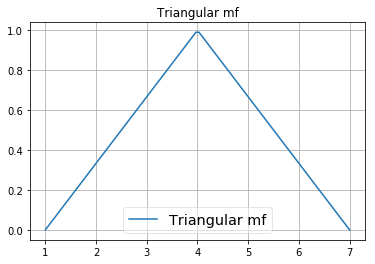

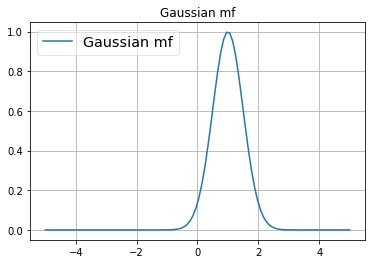

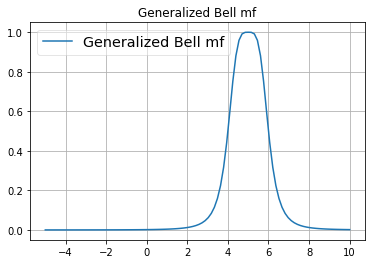

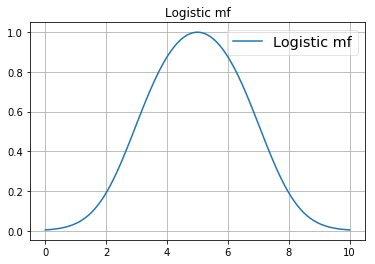

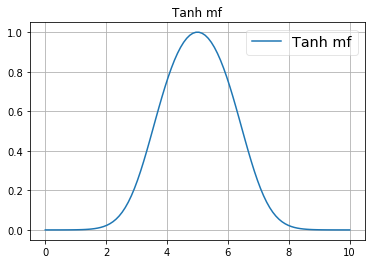

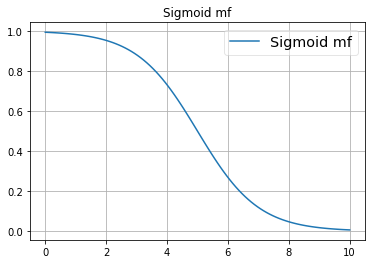

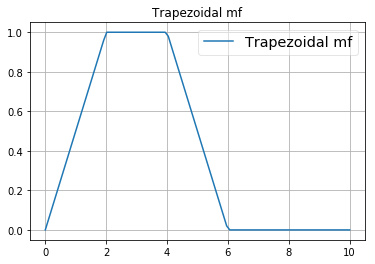

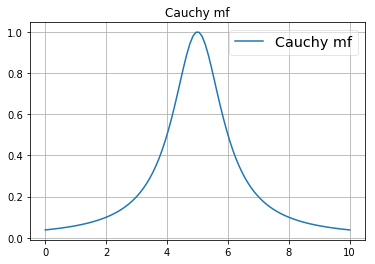

In [12]:
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

trimf = Trimf([1,4,7])
trimf.show()
gaussmf = Gaussmf([.5,1], universe=[-5,5])
gaussmf.show()
gbellmf = GBellmf([1,2,5], universe=[-5,10])
gbellmf.show()
logmf = Logmf([2,5], universe=[0,10])
logmf.show()
tanhmf = Tanhmf([2,5], universe=[0,10])
tanhmf.show()
sigmf = Sigmoidmf([-1,5], universe=[0,10])
sigmf.show()
trapmf = Trapmf([0,2,4,6], universe=[0,10])
trapmf.show()
cauchymf = Cauchymf([1,5], universe=[0,10])
cauchymf.show()

## Basic Tipping Problem

In [1]:
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

#INPUTS

service_poor = FuzzySet('poor', Gaussmf([1.5, 0]))
service_good = FuzzySet('good', Gaussmf([1.5, 5]))
service_excellent = FuzzySet('excellent', Gaussmf([1.5, 10]))
service_excellent.show()
service = FuzzyVariable('service',[service_poor, service_good, service_excellent], universe=[0, 10])
service.show()

food_rancid = FuzzySet('rancid', Trapmf([0,0,1,3]))
food_delicious = FuzzySet('delicious', Trapmf([7,9,10,10]))
food = FuzzyVariable('food', [food_rancid, food_delicious], universe=[0, 10])
food.show()

#OUTPUT

tip_cheap = FuzzySet('cheap', Trimf([0,5,10]))
tip_avg = FuzzySet('average', Trimf([10,15,20]))
tip_generous = FuzzySet('generous', Trimf([20,25,30]))
tip = FuzzyVariable('tip', [tip_cheap, tip_avg, tip_generous], universe=[0, 30])
tip.show()

#RULES


#ant1  = Antecedent(service['poor'], conector=max)
#ant1.add(food['rancid'])
ant1  = Antecedent(service['poor'] | food['rancid'])
cont1 = Consequent([tip['cheap']])
rule1 = FuzzyRule(ant1, cont1)

ant2  = Antecedent(service['good'] | food['delicious'])
cont2 = Consequent([tip['average']])
rule2 = FuzzyRule(ant2, cont2)


#ant3  = Antecedent(service['excellent'], conector=min)
#ant3.add(food['delicious'])
ant3 = Antecedent(service['excellent']& food['delicious'])
cont3 = Consequent([tip['generous']])
rule3 = FuzzyRule(ant3, cont3)

#Building the FIS

fis = FuzzyInferenceSystem([rule1, rule2, rule3])

#FIS Evaluation

inputs = {'service':8.183, 'food':8.59}
result = fis.eval(inputs)
#print(result)

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>


Evaluation of FIS with inputs:
service: 8.183
food: 8.59
	IF service is poor or food is rancid THEN tip is cheap = [3.44789797e-07] with weight = 1
	IF service is good or food is delicious THEN tip is average = [0.795] with weight = 1
	IF service is excellent and food is delicious THEN tip is generous = [0.4801464] with weight = 1


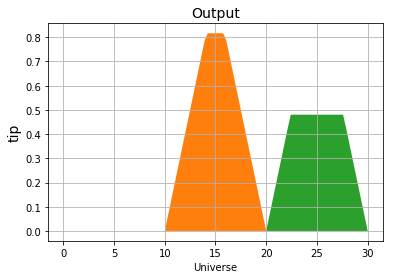

In [4]:
result.show()

In [5]:
#result(Centroid)
Centroid(result).eval()

{'tip': 19.303946212150755}

In [6]:
from FuzzySystem.Defuzzifier import  CenterOfSets, FirstOfMaximum, LastOfMaximum, LastOfMaximum, ModifiedHeights, Heights, MeanOfMaximum

Defuzzification_methods = [Centroid,CenterOfSets,  Heights, ModifiedHeights, MeanOfMaximum, LastOfMaximum, FirstOfMaximum]

for dm in Defuzzification_methods:
    print(dm.name)
    print("{:>5}\n".format(str(dm(result).eval())))

Centroid
{'tip': 19.303946212150755}

Center of Sets
{'tip': 18.702766575589195}

Heights
{'tip': 18.702766575589195}

Modified Heights
{'tip': 18.702766575589198}

Mean Of Maximum
{'tip': 15.0}

Least Of Maximum
{'tip': 15.757575757575758}

First Of Maximum
{'tip': 14.242424242424242}



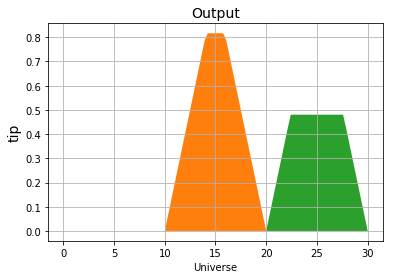

In [7]:
result.show()


# Non-singleton Input

In [8]:
from FuzzySystem.NonSingleton import NonSingleton
import numpy as np

In [9]:
nsinp1_values = np.linspace(0,10,50)
nsinp1 = NonSingleton(Gaussmf([2,5]), nsinp1_values)

nsinp2_values = np.linspace(0,10,50)
nsinp2 = NonSingleton(Gaussmf([2,5]), nsinp2_values)

nsinputs = {'service':nsinp1, 'food':nsinp2}

result = fis.eval(nsinputs)


Evaluation of FIS with inputs:
service: Non-singleton class: Gaussmf params: [2, 5]  Range [0.0 - 10.0]  Values 50
food: Non-singleton class: Gaussmf params: [2, 5]  Range [0.0 - 10.0]  Values 50
	IF service is poor and food is rancid THEN tip is cheap = 0.3963172373026286 with weight = 1
	IF service is good or food is delicious THEN tip is average = [0.9985614109683788] with weight = 1
	IF service is excellent and food is delicious THEN tip is generous = 0.3775510204081636 with weight = 1


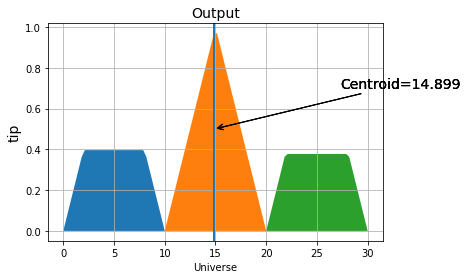

In [10]:
result.show(Centroid)

In [11]:
fis.matrix_rules

[[('service', 'poor'), ('food', 'rancid'), ('tip', 'cheap'), ('weight', 1)],
 [('service', 'good'),
  ('food', 'delicious'),
  ('tip', 'average'),
  ('weight', 1)],
 [('service', 'excellent'),
  ('food', 'delicious'),
  ('tip', 'generous'),
  ('weight', 1)]]